# Data Analysis on Laptop Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = pd.read_csv('laptop_data.csv')

In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [ ]:
df.describe(include=object)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [ ]:
df.isnull().sum()/len(df)*100

,0
Unnamed: 0,0.0
Company,0.0
TypeName,0.0
Inches,0.0
ScreenResolution,0.0
Cpu,0.0
Ram,0.0
Memory,0.0
Gpu,0.0
OpSys,0.0


In [ ]:
df.duplicated().sum()/len(df)*100

np.float64(0.0)

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 122.3+ KB


In [ ]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 122.3+ KB


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


# Exploratory Data Analysis

1. Target Feature

<Axes: ylabel='Price'>

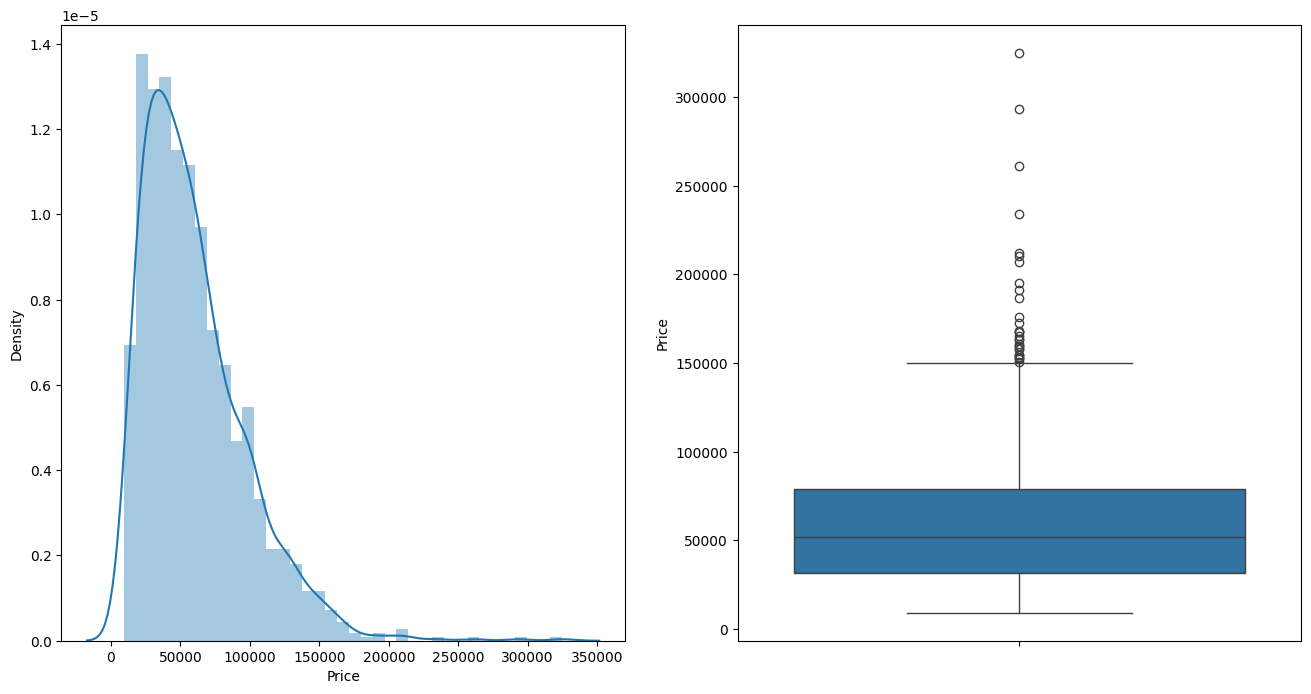

In [ ]:
plt.figure(figsize=(16 ,8))
plt.subplot(1,2,1)
sns.distplot(df['Price'])

plt.subplot(1,2,2)
sns.boxplot(df['Price'])

2. Company Feature

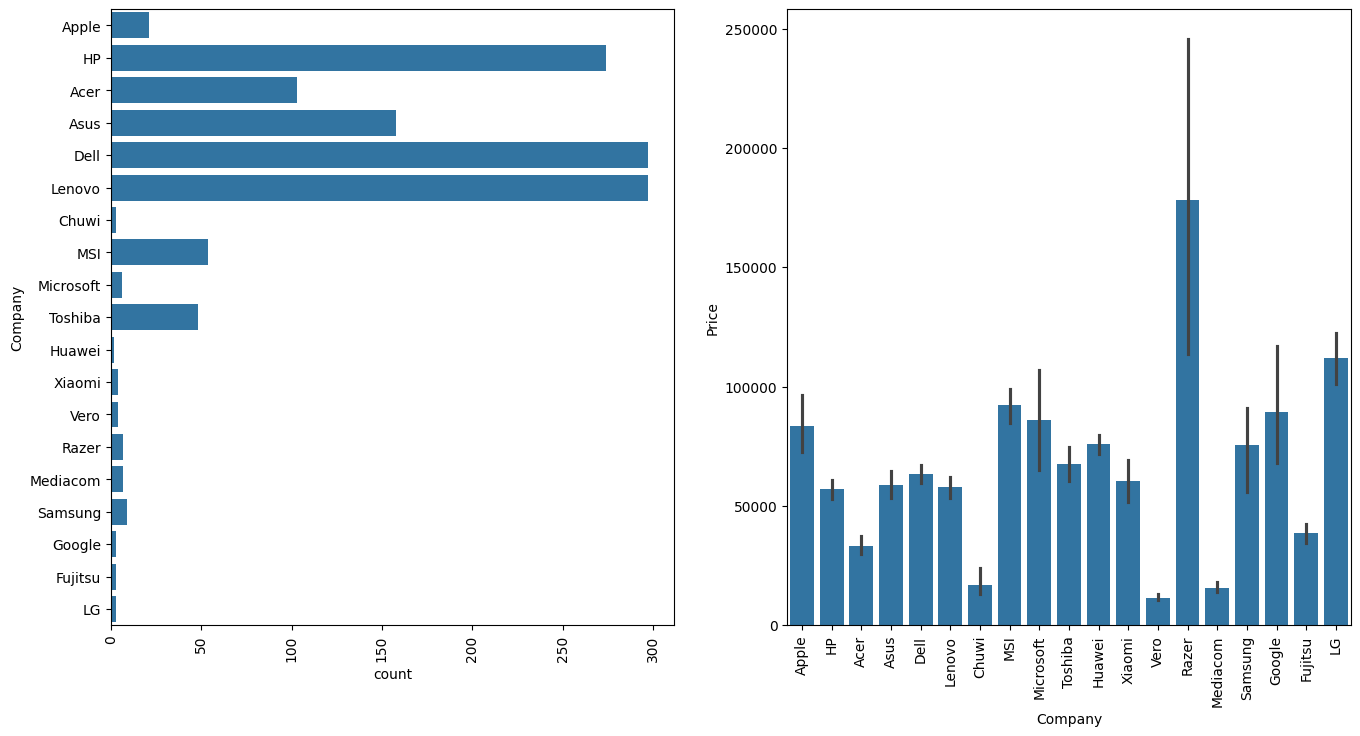

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['Company'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Company',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

3. Type name feature

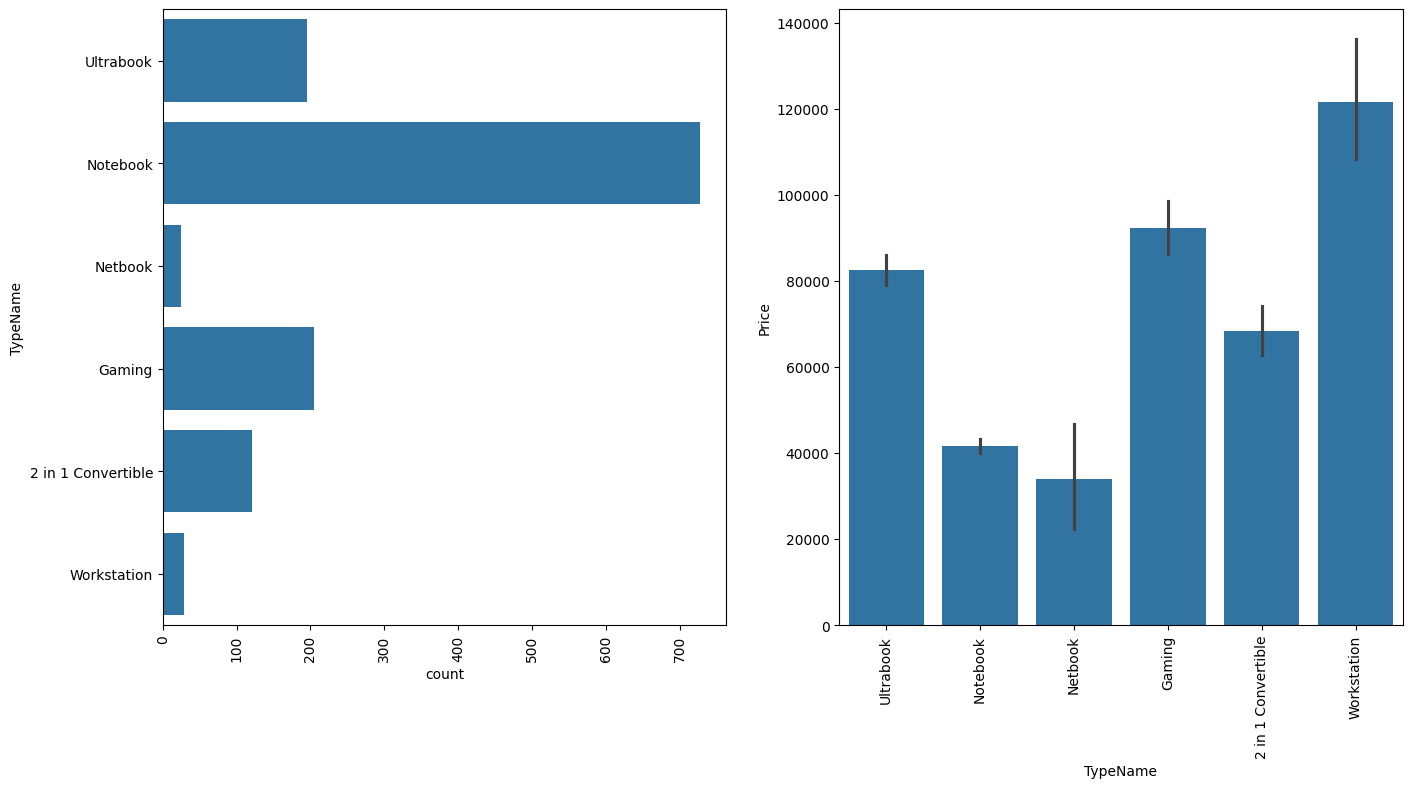

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['TypeName'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['operating_system']=df['OpSys'].apply(cat_os)

4. operating_system Feature

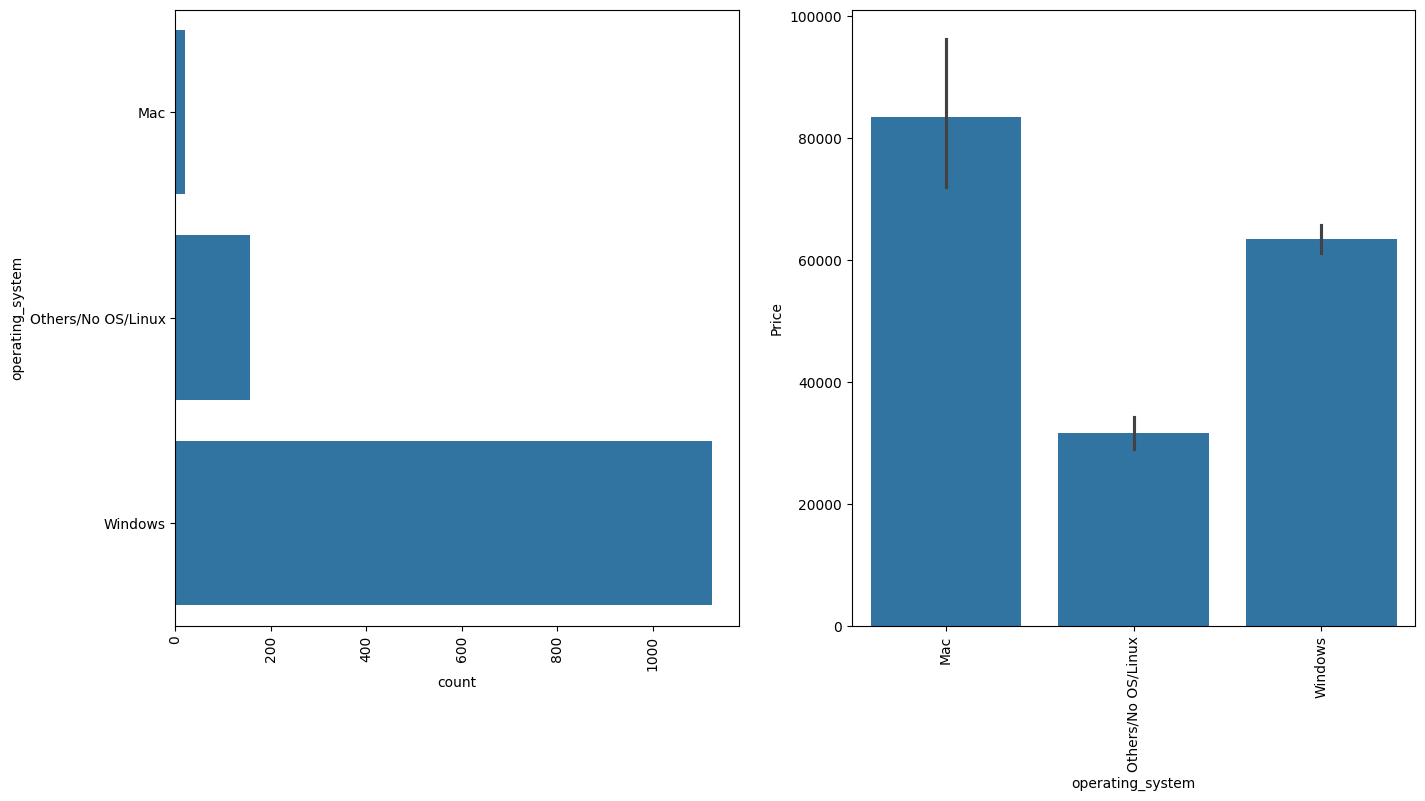

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.countplot(df['operating_system'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='operating_system',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

5. Inches Feature

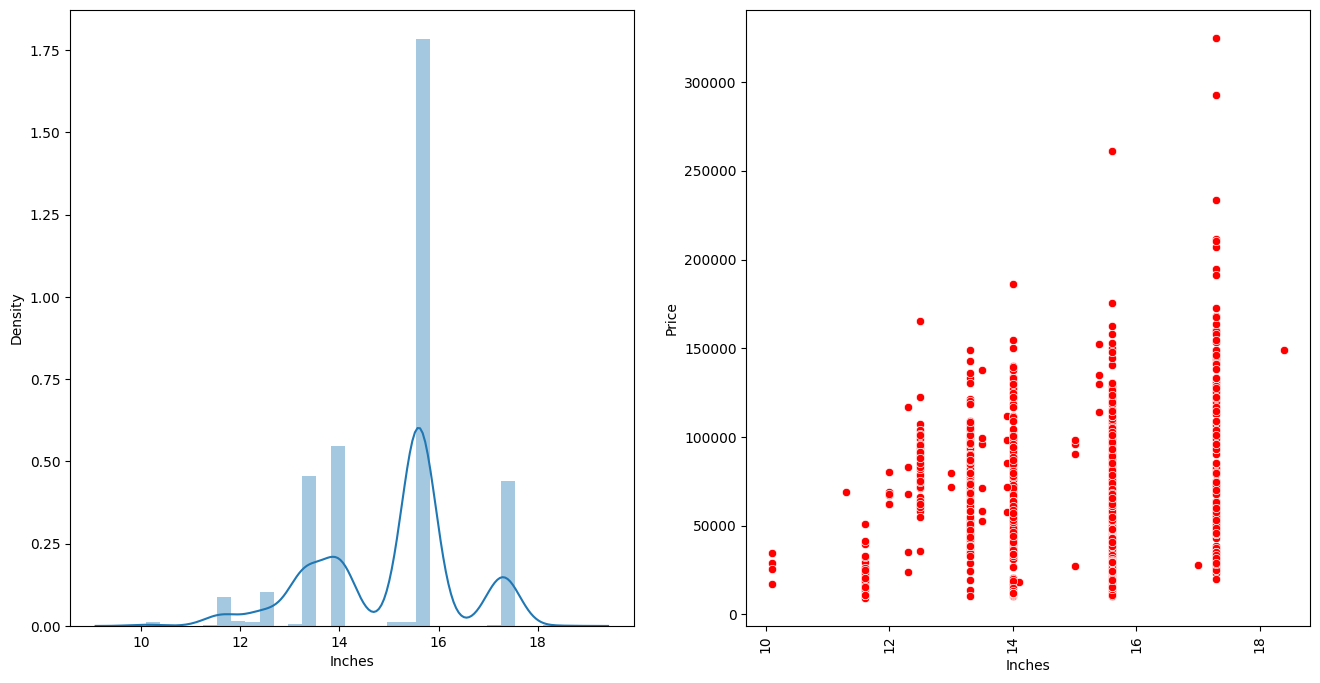

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Inches'])

plt.subplot(1,2,2)
sns.scatterplot(x='Inches',y='Price',color='red',data=df)
plt.xticks(rotation=90)
plt.show()

6. Ram Feature

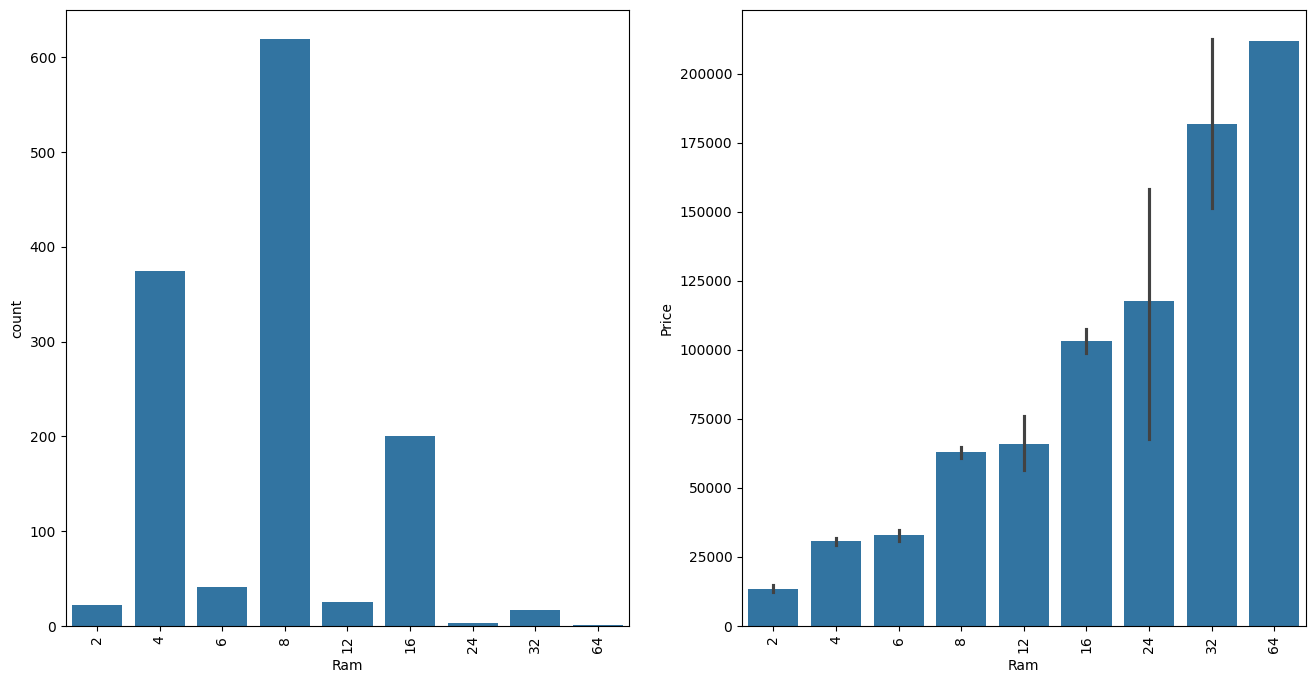

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='Ram', data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Ram',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

7. Weight Feature

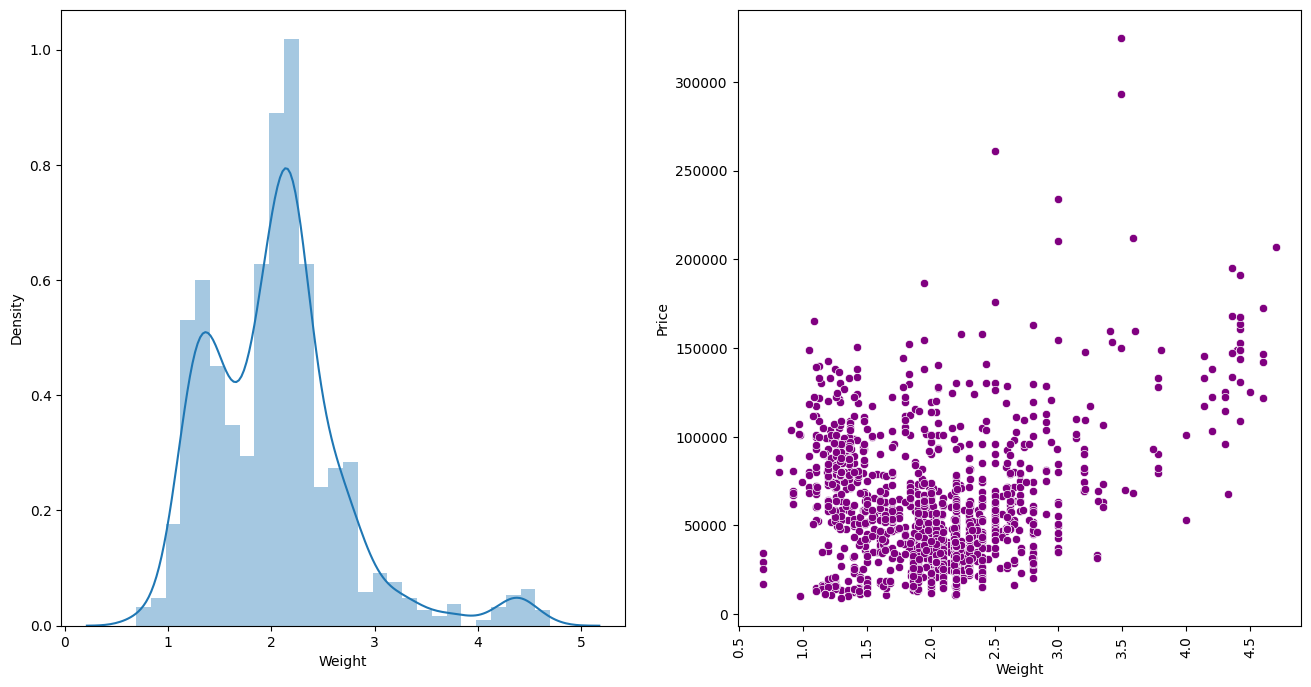

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Weight'])

plt.subplot(1,2,2)
sns.scatterplot(x='Weight',y='Price',color='purple',data=df)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering




In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0


8. TouchScreen Feature

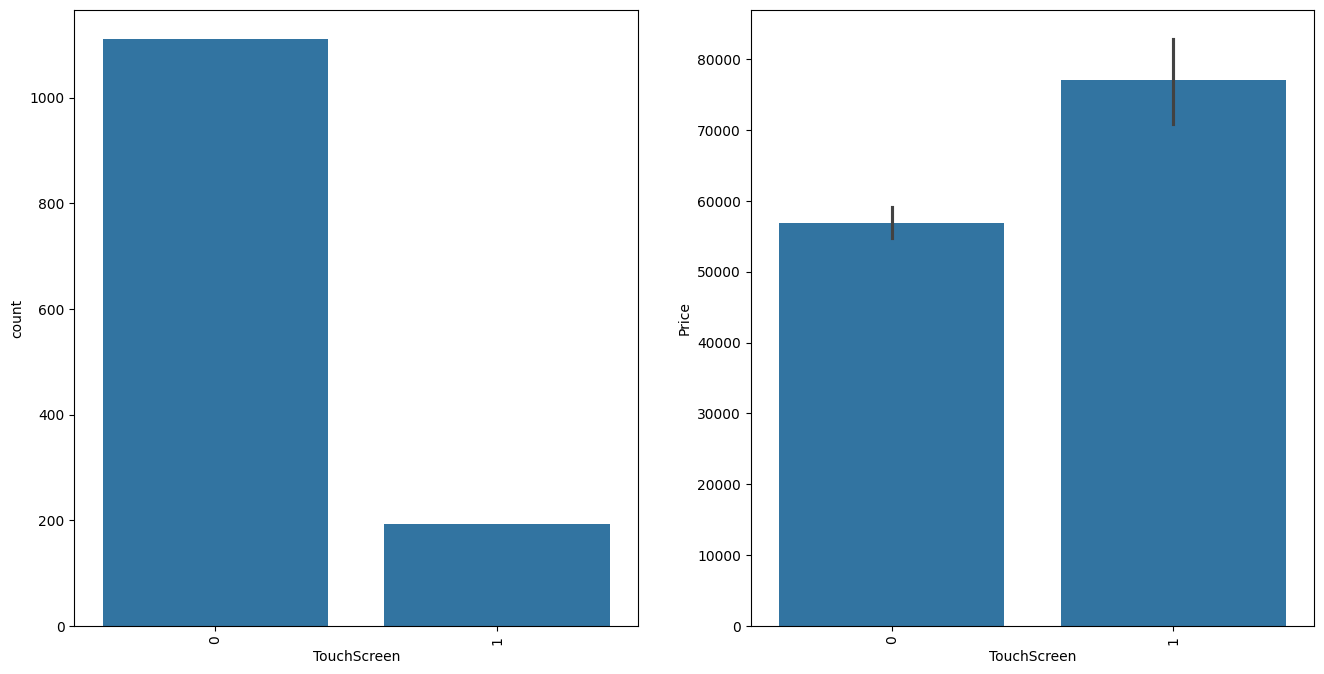

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='TouchScreen',data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='TouchScreen',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0


9. IPS Feature

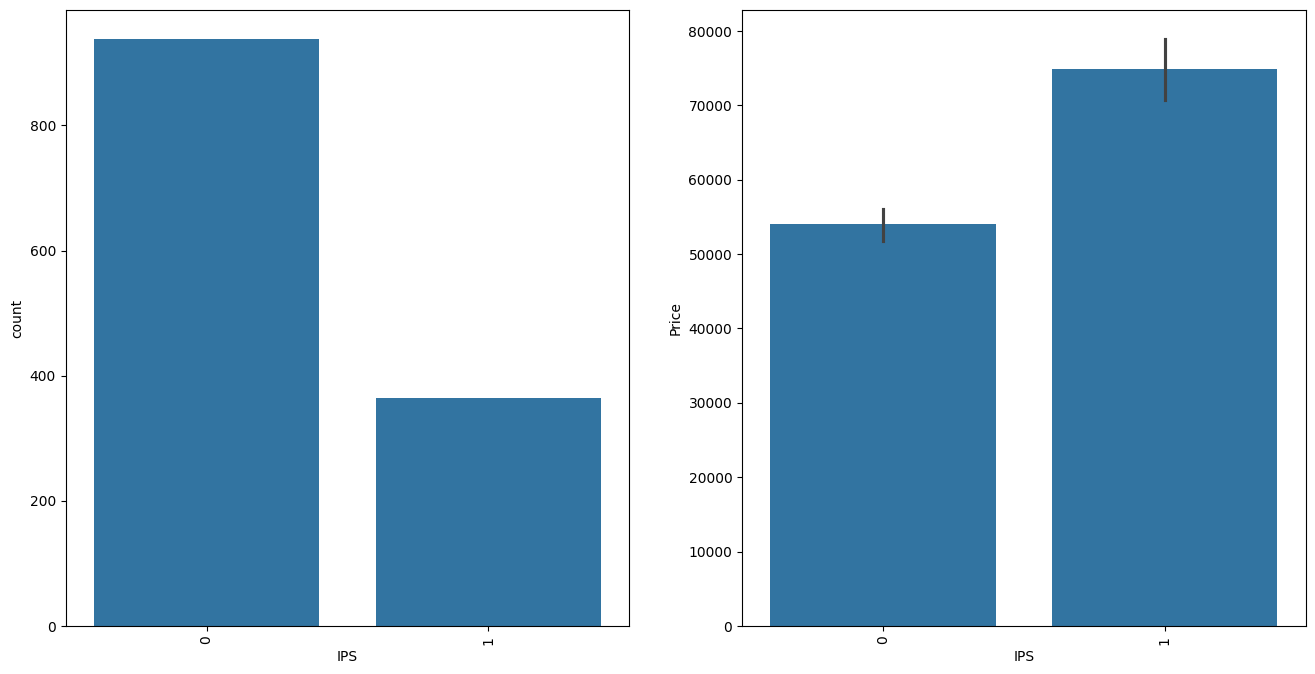

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='IPS',data=df)
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(x='IPS',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['4K_Ultra_HD'] = df['ScreenResolution'].apply(lambda x:1 if '4K Ultra HD' in x else 0)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0


10. 4K_Ultra_HD Feature

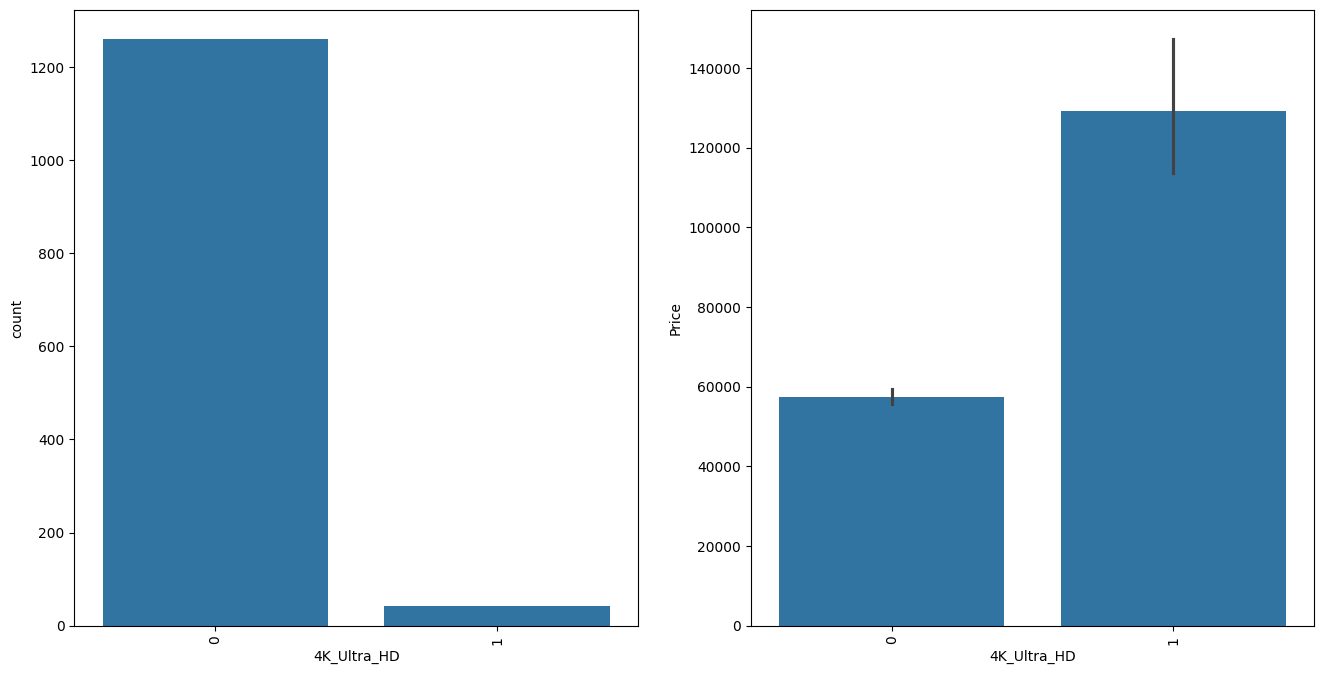

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='4K_Ultra_HD',data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='4K_Ultra_HD', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [ ]:
df['CPU_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_Name
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Celeron Dual
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7


In [ ]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Intel Other Processor'
        else:
            return 'AMD Processor'


In [ ]:
df['CPU_BRAND'] = df['CPU_Name'].apply(fetch_processor)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_Name,CPU_BRAND
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,Intel Core i5
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,Intel Core i5
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,Intel Core i5
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,Intel Core i7
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,Intel Core i7
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,Intel Core i7
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Celeron Dual,Intel Other Processor
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,Intel Core i7


In [ ]:
df.drop(columns=['Cpu','ScreenResolution','CPU_Name'],inplace=True)
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND
0,0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5
1,1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5
2,2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5
3,3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7
4,4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7
1299,1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7
1300,1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor
1301,1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7


In [ ]:
df['CPU_BRAND'].value_counts()

,count
CPU_BRAND,
Intel Core i7,527
Intel Core i5,423
Intel Other Processor,154
Intel Core i3,136
AMD Processor,63


11. CPU_BRAND Feature

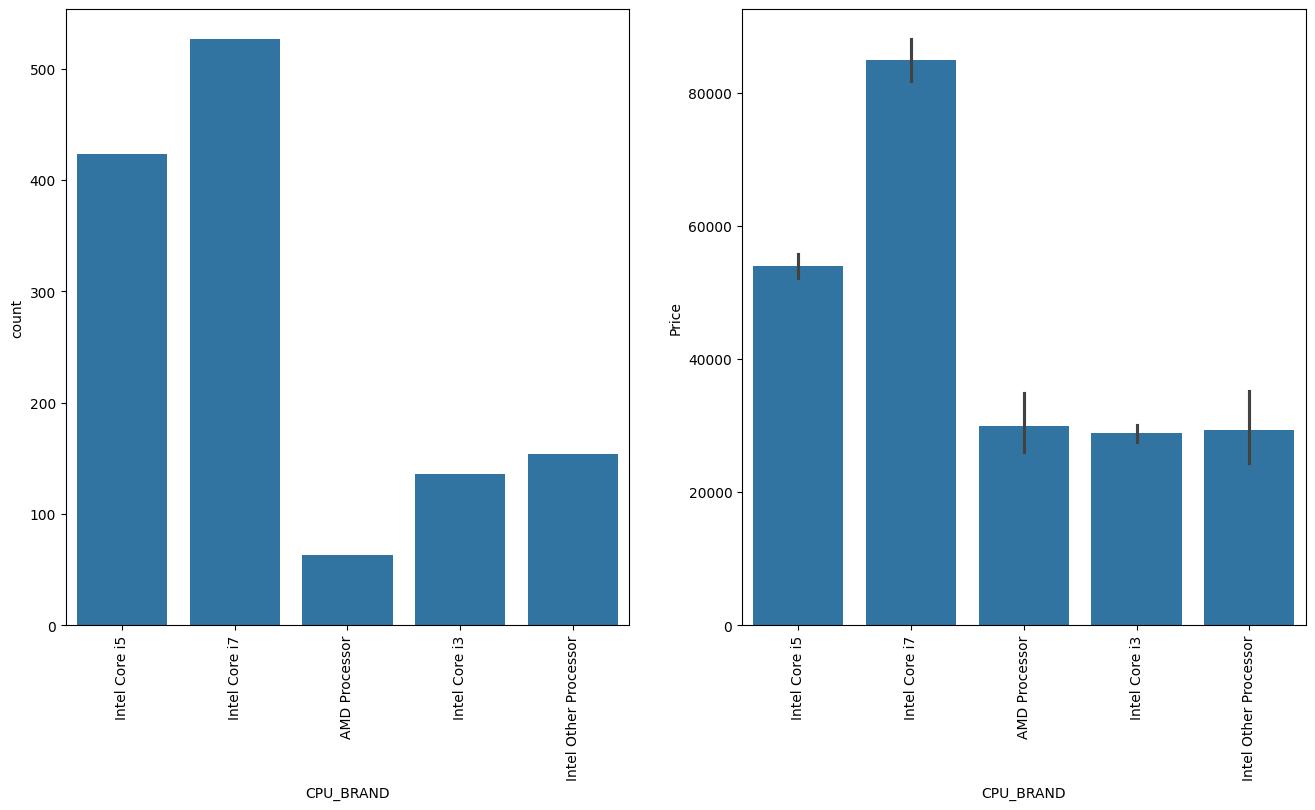

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='CPU_BRAND', data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='CPU_BRAND',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only the numerical part before converting to integer
df['first'] = df['first'].str.extract('(\d+)', expand=False)


df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only the numerical part before converting to integer
df['second'] = df['second'].str.extract('(\d+)', expand=False).fillna('0')


df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [ ]:
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128
2,2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0
3,3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0
4,4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0
1299,1299,Lenovo,2 in 1 Convertible,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0
1300,1300,Lenovo,Notebook,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64
1301,1301,HP,Notebook,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0


13. SSD Feature


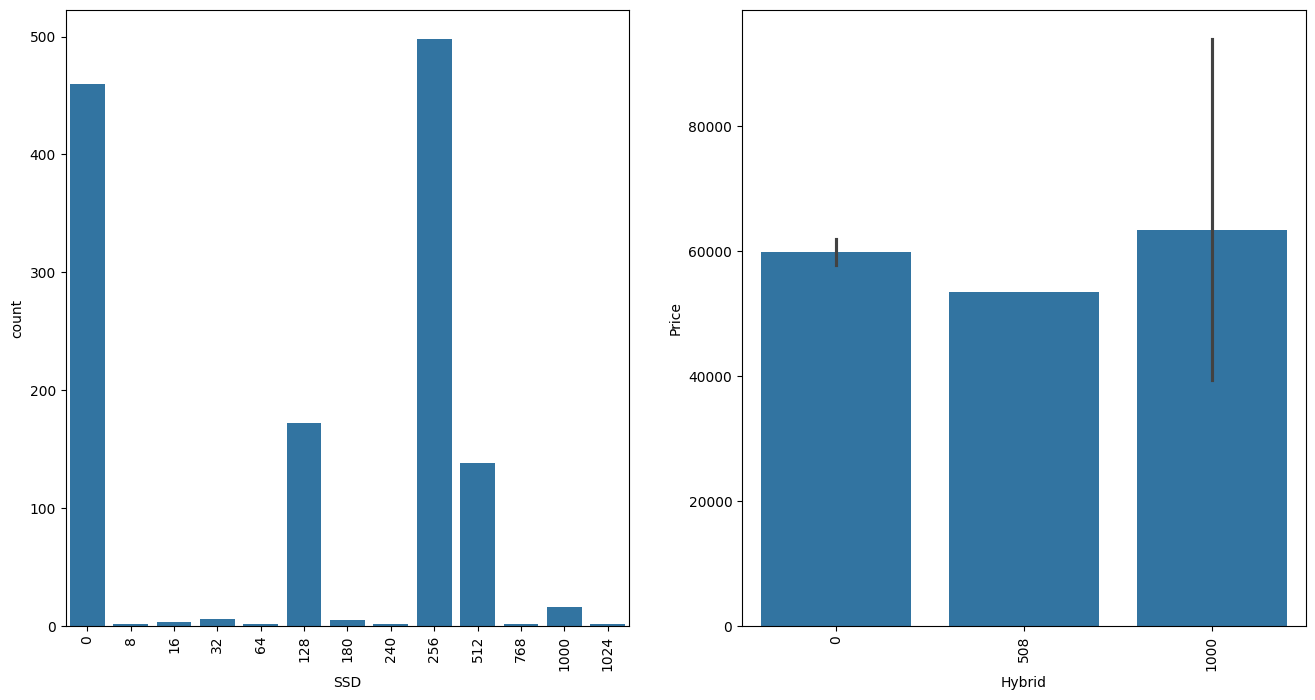

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='SSD',data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Hybrid',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

14. Hybrid Feature

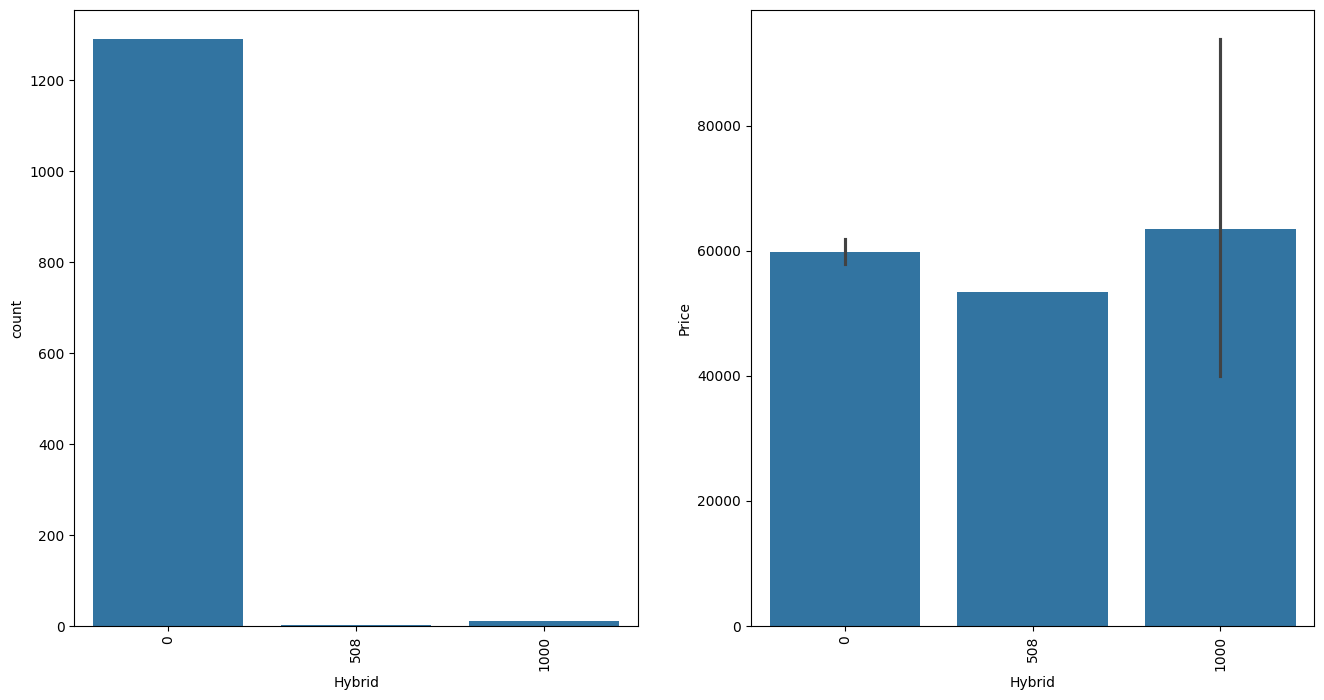

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='Hybrid',data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Hybrid', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(columns=['Memory'],inplace=True)
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128
2,2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0
3,3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0
4,4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0
1299,1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0
1300,1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64
1301,1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [ ]:
df['GPU_BRAND']=df['Gpu'].apply(lambda x: x.split()[0])
df

,Unnamed: 0,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0,Intel
1299,1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0,Intel
1300,1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64,Intel
1301,1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0,AMD


In [ ]:
df['GPU_BRAND'].value_counts()

,count
GPU_BRAND,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
df = df[df['GPU_BRAND'] != 'ARM']
df.head()

,Unnamed: 0,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel


15. GPU_BRAND Feature

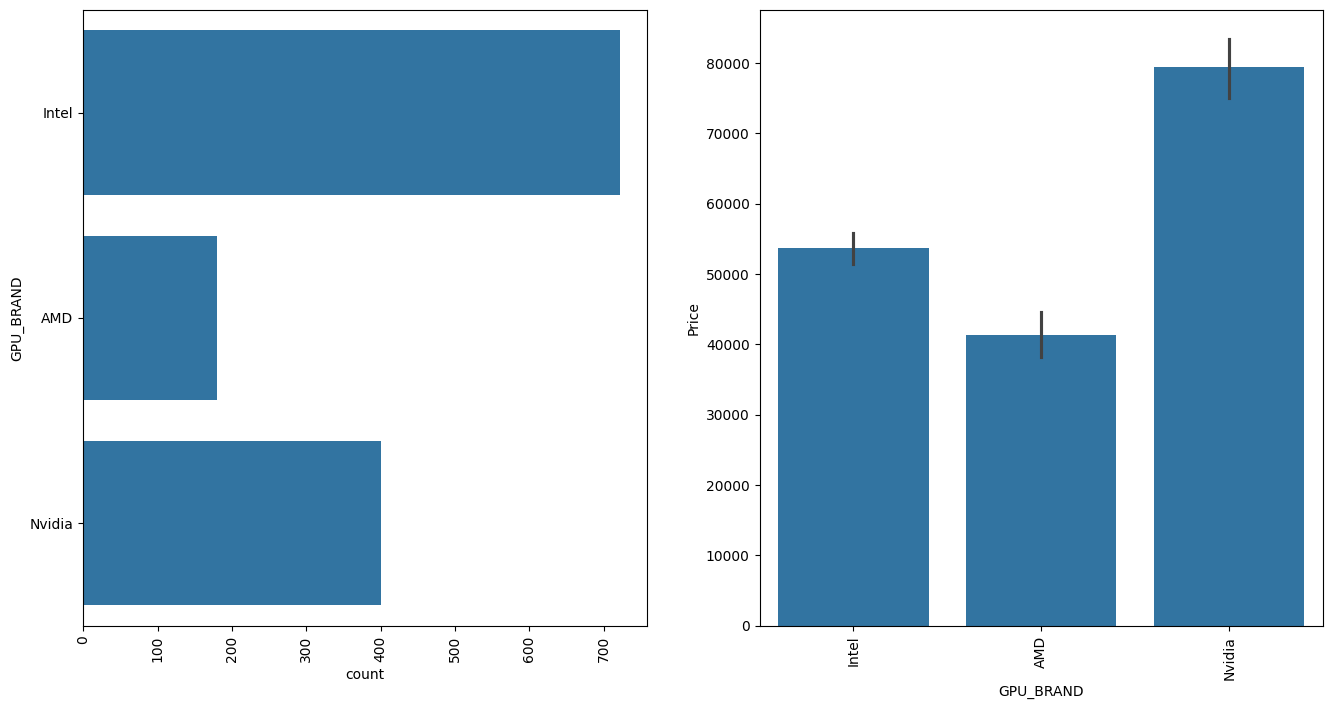

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['GPU_BRAND'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='GPU_BRAND',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)
df

,Unnamed: 0,Company,TypeName,Inches,Ram,OpSys,Weight,Price,operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0,Intel
1299,1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0,Intel
1300,1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64,Intel
1301,1301,HP,Notebook,15.6,6,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0,AMD


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,120
Workstation,29
Netbook,25


In [ ]:
df.drop(columns=['OpSys'],inplace=True)

## Apply One hot Encoding on Categorical Columns for ML Model

In [ ]:
df = pd.get_dummies(columns=['Company','TypeName','operating_system','CPU_BRAND','GPU_BRAND'],data=df)
df

,Unnamed: 0,Inches,Ram,Weight,Price,TouchScreen,IPS,4K_Ultra_HD,HDD,SSD,...,operating_system_Others/No OS/Linux,operating_system_Windows,CPU_BRAND_AMD Processor,CPU_BRAND_Intel Core i3,CPU_BRAND_Intel Core i5,CPU_BRAND_Intel Core i7,CPU_BRAND_Intel Other Processor,GPU_BRAND_AMD,GPU_BRAND_Intel,GPU_BRAND_Nvidia
0,0,13.3,8,1.37,71378.6832,0,1,0,0,128,...,False,False,False,False,True,False,False,False,True,False
1,1,13.3,8,1.34,47895.5232,0,0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
2,2,15.6,8,1.86,30636.0000,0,0,0,0,256,...,True,False,False,False,True,False,False,False,True,False
3,3,15.4,16,1.83,135195.3360,0,1,0,0,512,...,False,False,False,False,False,True,False,True,False,False
4,4,13.3,8,1.37,96095.8080,0,1,0,0,256,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,4,1.80,33992.6400,1,1,0,0,128,...,False,True,False,False,False,True,False,False,True,False
1299,1299,13.3,16,1.30,79866.7200,1,1,0,0,512,...,False,True,False,False,False,True,False,False,True,False
1300,1300,14.0,2,1.50,12201.1200,0,0,0,0,0,...,False,True,False,False,False,False,True,False,True,False
1301,1301,15.6,6,2.19,40705.9200,0,0,0,1000,0,...,False,True,False,False,False,True,False,True,False,False
